## Importing Packages

In [3]:
import fastf1
import fastf1.plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fastf1.plotting.setup_mpl()

## Loading Session Data

In [4]:
year = 2025
race = "British Grand Prix"

session = fastf1.get_session(year, race, 'R')
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (494.71 MB) C:\Users\odath\AppData\Local\Temp\fastf1


core           INFO 	Loading data for British Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '27', '44', '1', '10', '18', '23', '14', '63', '87', '55', '31', '16', '22', '12', '6', '5', '30', '43']


## Loading and Preparing Lap Data

In [7]:
laps = session.laps
laps = laps.sort_values(['Driver', 'LapNumber'])
laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()
laps.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTimeSeconds
334,0 days 00:58:01.402000,ALB,23,0 days 00:01:52.180000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:43.343000,...,Williams,0 days 00:56:09.003000,2025-07-06 14:03:49.616,12,9.0,False,,False,False,112.180
335,0 days 01:00:20.167000,ALB,23,0 days 00:02:18.765000,2.0,1.0,NaT,NaT,0 days 00:00:58.205000,0 days 00:00:47.127000,...,Williams,0 days 00:58:01.402000,2025-07-06 14:05:42.015,26,9.0,False,,False,False,138.765
336,0 days 01:02:36.823000,ALB,23,0 days 00:02:16.656000,3.0,1.0,NaT,NaT,0 days 00:00:50.169000,0 days 00:00:51.169000,...,Williams,0 days 01:00:20.167000,2025-07-06 14:08:00.780,6,8.0,False,,False,False,136.656
337,0 days 01:04:22.597000,ALB,23,0 days 00:01:45.774000,4.0,1.0,NaT,NaT,0 days 00:00:33.774000,0 days 00:00:42.651000,...,Williams,0 days 01:02:36.823000,2025-07-06 14:10:17.436,6712,8.0,False,,False,False,105.774
338,0 days 01:06:13.458000,ALB,23,0 days 00:01:50.861000,5.0,1.0,NaT,NaT,0 days 00:00:32.304000,0 days 00:00:43.596000,...,Williams,0 days 01:04:22.597000,2025-07-06 14:12:03.210,126,8.0,False,,False,False,110.861


## Compound color map

In [8]:
COMPOUND_COLORS = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFD700',
    'HARD': "#C6BFBF",
    'INTERMEDIATE': '#39B54A',
    'WET': '#0077FF'
}

## Race Statergy Comparison between different drivers

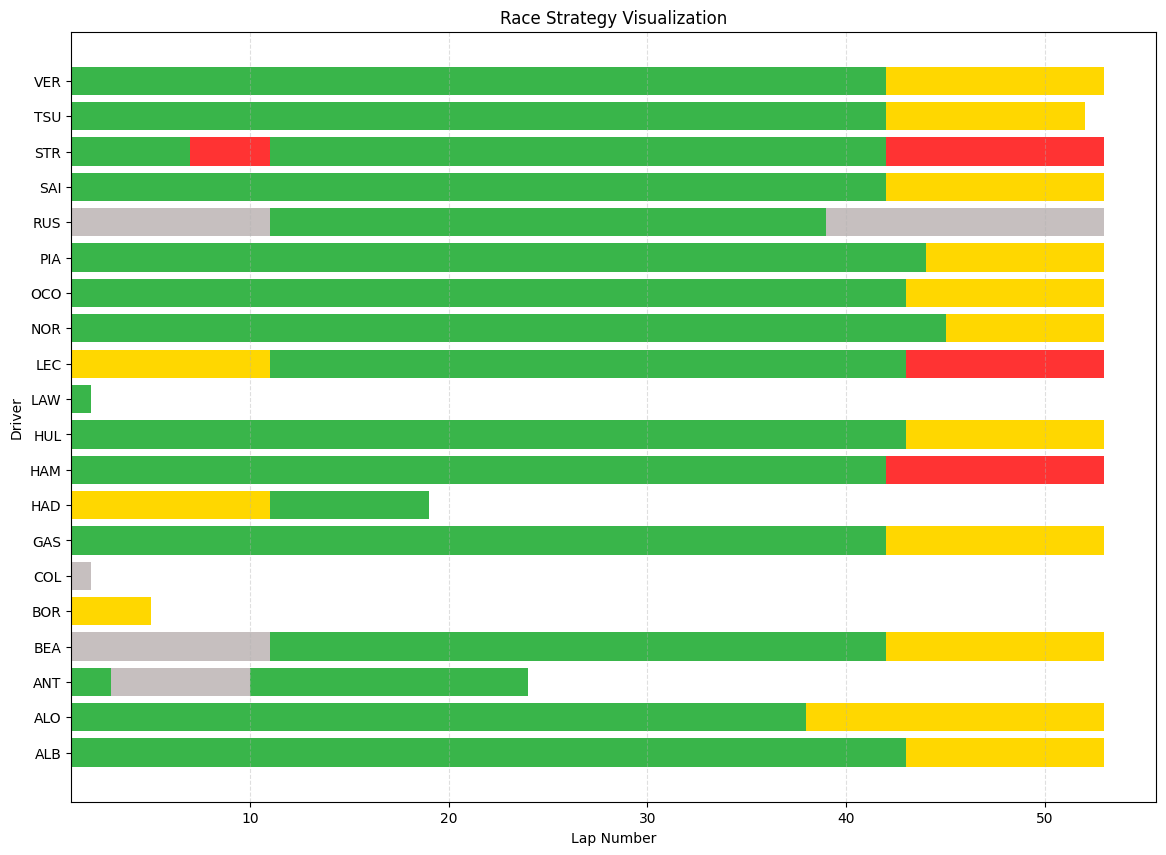

In [9]:
drivers = laps['Driver'].unique()

fig, ax = plt.subplots(figsize=(14,10))

for driver in drivers:
    stints = laps[laps['Driver'] == driver].groupby('Stint')
    
    for stint, data in stints:
        compound = data['Compound'].iloc[0]
        ax.barh(
            driver,
            len(data),
            left=data['LapNumber'].min(),
            color=COMPOUND_COLORS.get(compound, '#AAAAAA')
        )

ax.set_xlabel("Lap Number")
ax.set_ylabel("Driver")
ax.set_title("Race Strategy Visualization")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()
